In [5]:
import numpy as np

## Q1 
Projection Matrix

In [1]:
lst = []
E = [[321.747,309.140,30.086,880,214],[305.749,311.649,30.356,43,203],
     [307.694,312.356,30.416,270,197],[310.149,307.186,29.298,886,347],
    [311.937,310.105,29.216,745,302],[311.202,307.572,30.682,943,128],
    [307.106,306.878,28.660,476,590],[309.317,312.490,30.230,419,214],
    [307.435,310.151,29.318,317,335],[308.253,306.300,28.881,783,521],
    [306.650,309.301,28.905,235,427],[308.069,306.831,29.189,665,429],
    [309.671,308.834,29.029,665,362],[308.255,309.955,29.267,427,333],
    [307.546,308.613,28.963,412,415],[311.036,309.206,28.913,746,351],
    [307.519,308.175,29.069,434,415],[309.950,311.262,29.990,525,234],
    [312.160,310.772,29.080,716,308],[311.988,312.709,30.514,602,187]]


In [2]:
lst = []

for v in E:
    s1 = []
    s2 = []
    s2+=[0]*4
    for i in v[0:3]:
        s1.append(i)
        s2.append(i)
    s2+=[1]

    s1+=[1]
    s1+=[0]*4
    for i in v[0:3]:
        s1.append(-i*v[3])
        s2.append(-i*v[4])
    s1.append(-v[3])
    s2.append(-v[4])
    # int(s1.split(','))
    s1,s2
    lst.append(s1)
    lst.append(s2)
# lst

In [6]:
b=[]
for i in E:
    b.append(i[-2:])
b = list(np.concatenate(b).flat)
b = [[i] for i in b]
b = np.asarray(b)
b.shape

(40, 1)

In [7]:
A = np.asarray(lst)
A.shape

(40, 12)

In [8]:
M = []
M = np.linalg.lstsq(A,b,rcond = -1)[0]
# M = np.append(M,1)
M
M = np.reshape(M,(3,4))
M

array([[ 4.98824634e-14, -1.19583163e-14,  2.01748951e-13,
        -1.72502877e-11],
       [ 7.81059245e-16,  2.21373484e-14, -3.77597123e-15,
        -6.85046469e-12],
       [ 3.64291930e-17,  6.70036943e-17,  2.38903949e-16,
        -1.00000000e+00]])

In [10]:
b= [0]*len(b)
# b

In [11]:
U,S,Vh = np.linalg.svd(A)
M = Vh[-1,:]
M = np.reshape(M,(3,4))
M

array([[ 2.04983984e-03,  1.21720953e-03, -2.20303232e-03,
        -9.39929354e-01],
       [ 4.87459881e-04,  8.02522553e-04, -1.86467461e-03,
        -3.41344347e-01],
       [ 2.03219058e-06,  2.75155559e-06, -2.49136573e-06,
        -1.39651144e-03]])

In [12]:
H = M[:,:3]
h = M[:,3].reshape(3,1)
H_inv = np.linalg.inv(H)
H_inv

array([[ 7.98291136e+02, -7.72255645e+02, -1.27904015e+05],
       [-6.56434970e+02, -1.60587070e+02,  7.00655895e+05],
       [-7.38300208e+01, -8.07282075e+02,  2.68113309e+05]])

In [13]:
R_T,K_inv = np.linalg.qr(H_inv)


In [14]:
R_T

array([[-0.77043269, -0.4193071 , -0.48022393],
       [ 0.63352696, -0.4193599 , -0.65021601],
       [ 0.07125353, -0.80518248,  0.58873093]])

### Rotation Matrix

In [15]:
R = R_T.T
R

array([[-0.77043269,  0.63352696,  0.07125353],
       [-0.4193071 , -0.4193599 , -0.80518248],
       [-0.48022393, -0.65021601,  0.58873093]])

In [16]:
np.linalg.inv(R_T.T)

array([[-0.77043269, -0.4193071 , -0.48022393],
       [ 0.63352696, -0.4193599 , -0.65021601],
       [ 0.07125353, -0.80518248,  0.58873093]])

In [17]:
K_inv

array([[-1.03615949e+03,  4.35713056e+02,  5.61529853e+05],
       [ 0.00000000e+00,  1.04116544e+03, -4.56076065e+05],
       [ 0.00000000e+00,  0.00000000e+00, -2.36308513e+05]])

### Intrinsic maxtrix

In [19]:
K = np.linalg.inv(K_inv)
K = K/K[-1,-1]
K

array([[ 228.06191189,  -95.44069448,  726.1346019 ],
       [  -0.        , -226.96538385,  438.0438005 ],
       [   0.        ,    0.        ,    1.        ]])

### Translation Matrix

In [20]:
t = K_inv@h
t

array([[ 41.00566319],
       [281.51950718],
       [330.00754269]])

### Extrensic Matrix
[R t]

In [25]:
np.concatenate((R,t),axis = 1)

(3, 4)

## Q2 Noise levels

In [27]:
import matplotlib.pyplot as plt
import cv2

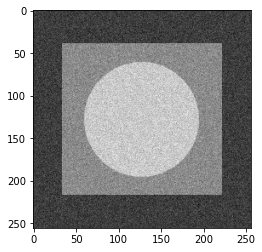

In [31]:
img = plt.imread('Fig1.tif')
plt.imshow(img,'gray')

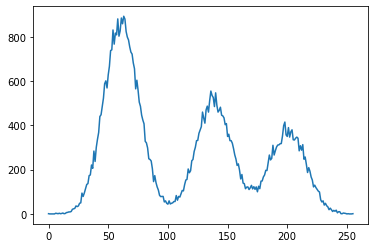

In [57]:
# calculate frequency of pixels in range 0-255
histg = cv2.calcHist([img],[0],None,[256],[0,256])

# show the plotting graph of an image
plt.plot(histg)
plt.show()

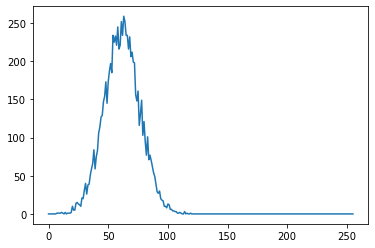

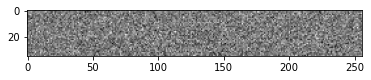

In [56]:
crop = img[0:35, 0:]  
# calculate frequency of pixels in range 0-255
histg = cv2.calcHist([crop],[0],None,[256],[0,256])

# show the plotting graph of an image
plt.plot(histg)
plt.show()
plt.imshow(crop,'gray')
plt.show()

In [59]:
import pandas as pd

In [64]:
histp = pd.DataFrame(histg).value_counts()/256

ValueError: setting an array element with a sequence.

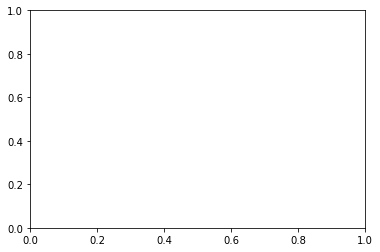

In [65]:
plt.plot(histp)
plt.show()
plt.imshow(crop,'gray')
plt.show()